In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2  


os.chdir(r"C:\Users\Robur\Desktop\Nowy folder\Tensorflow-Object-Detection-API-Train-Model-master\images")
test = "test_labels.csv"
train = "train_labels.csv"

data_test = pd.read_csv(test)
data_train = pd.read_csv(train)


In [3]:
data_test_filename_unique = data_test["filename"].unique()
data_test_filename_unique_len = len(data_test_filename_unique)

In [4]:
data_train_filename_unique = data_train["filename"].unique()
data_train_filename_unique_len = len(data_train_filename_unique)

In [5]:
data_test_class_unique = data_test["class"].unique()
data_test_class_unique_len = len(data_test_class_unique)

In [6]:
data_train_class_unique = data_train["class"].unique()
data_train_class_unique_len = len(data_train_class_unique)

In [7]:
data_test_boxes = len(data_test["xmin"])
data_train_boxes = len(data_train["xmin"])

Text(0.5, 1.0, 'Amount of unique photos')

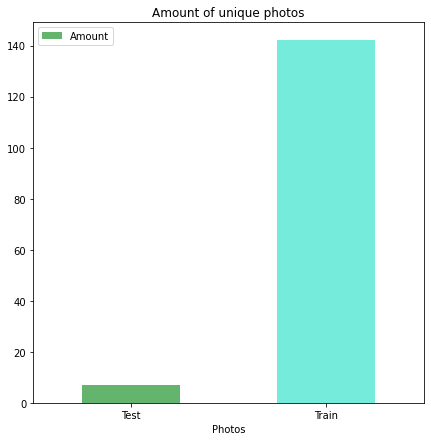

In [8]:
train_vs_test_filename = pd.DataFrame({"Photos":["Test", "Train"], "Amount":[data_test_filename_unique_len, data_train_filename_unique_len]})
train_vs_test_filename_plot = train_vs_test_filename.plot.bar(x = "Photos", y = "Amount", rot = 0, color = [(0.138, 0.58, 0.185, 0.7), (0.233, 0.89, 0.80, 0.7)], figsize=(7, 7))    
plt.title('Amount of unique photos')

                     Bounding boxes for classes in test data


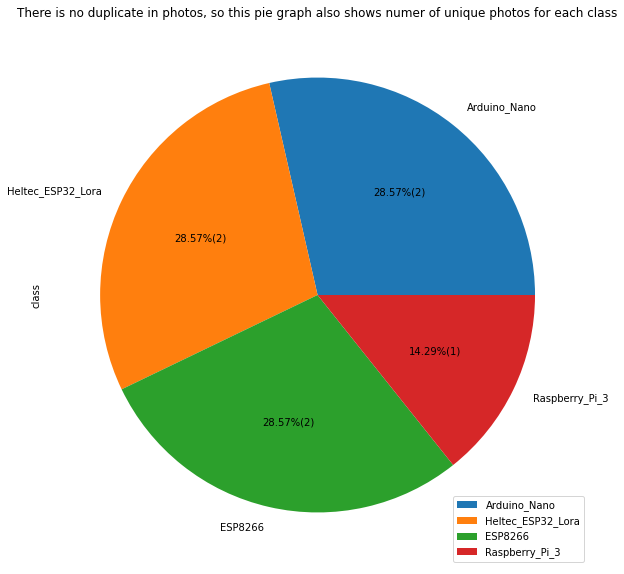

In [9]:
#if object was recognized it had to be in bounding box. So number of recognized items will be equal to number of bounding boxes.
data_test_class_unique = pd.DataFrame(data_test["class"].value_counts(), index = ['Arduino_Nano', 'Heltec_ESP32_Lora', 'ESP8266', 'Raspberry_Pi_3'])

data_test_class_unique.plot.pie(y = "class", figsize=(10, 10), autopct = lambda f: '{:.2f}%({:.0f})'.format(f,(f/100)*data_test_class_unique.sum().sum()))
plt.title('There is no duplicate in photos, so this pie graph also shows numer of unique photos for each class')
print('                     Bounding boxes for classes in test data') 


                   class
Arduino_Nano          41
Heltec_ESP32_Lora     42
ESP8266               45
Raspberry_Pi_3        42


Text(0.5, 1.0, 'Bounding boxes for classes in train data')

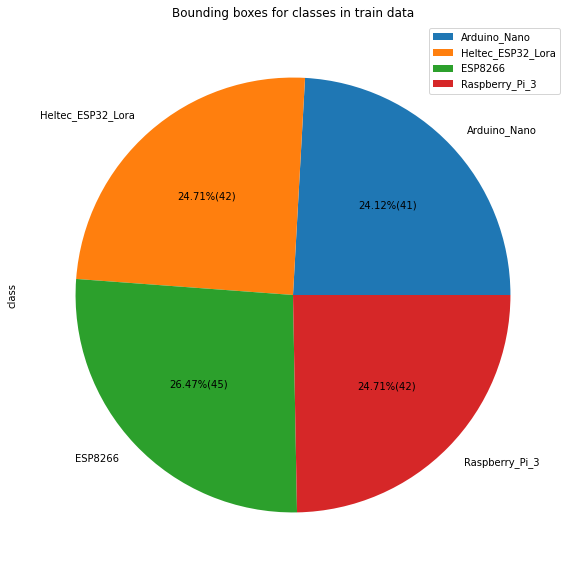

In [10]:
data_train_class_unique = pd.DataFrame(data_train["class"].value_counts(), index = ['Arduino_Nano', 'Heltec_ESP32_Lora', 'ESP8266', 'Raspberry_Pi_3'])
print(data_train_class_unique)
data_train_class_unique.plot.pie(y = "class", figsize=(10, 10), autopct = lambda f: '{:.2f}%({:.0f})'.format(f,(f/4.1)*data_test_class_unique.sum().sum()))
plt.title('Bounding boxes for classes in train data') 

In [11]:
data_train1 = data_train.drop_duplicates(subset='filename', keep = False)
print(len((data_train1)))


122


In [12]:
data_train_class_unique1 = data_train1["class"].unique()
data_train_class_unique_len1 = len(data_train_class_unique1)

Text(0.5, 1.0, 'Unique photo for every class')

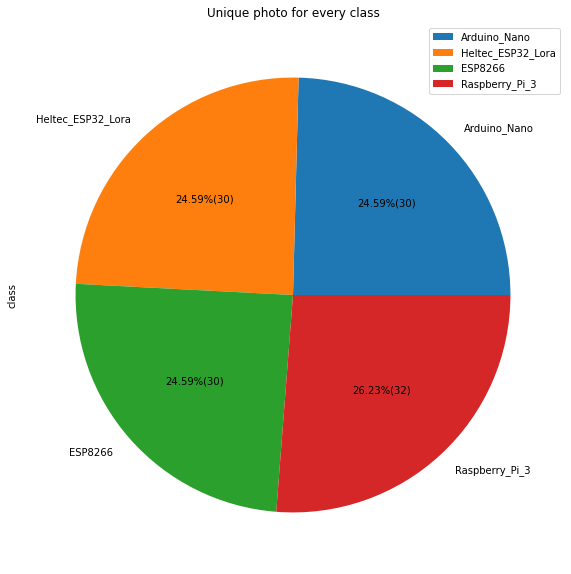

In [13]:
data_train_class_unique1 = pd.DataFrame(data_train1["class"].value_counts(), index = ['Arduino_Nano', 'Heltec_ESP32_Lora', 'ESP8266', 'Raspberry_Pi_3'])
data_train_class_unique1.plot.pie(y = "class", figsize=(10, 10), autopct = lambda f: '{:.2f}%({:.0f})'.format(f,(f/100)*data_train_class_unique1.sum().sum()))
plt.title('Unique photo for every class') 

In [26]:
def draw_rect(data ,name, imag):
    df = data[(data["filename"] == name)]
    start_point = (df['xmin'], df['ymin'])
    end_point = (df['xmax'], df['ymax'])
    color = (251, 173, 80)
    font = cv2.FONT_ITALIC
    thickness = 2
    image = cv2.rectangle(imag, start_point, end_point, color, thickness)
    text = df['class'].iloc[0]
    cv2.putText(image, text, (df['xmin'] + 1, df['ymin'] - 10), font, 0.9, (251, 173, 80), 2 )
    cv2.imshow(window_test1, image)
    cv2.waitKey()
    return image


In [27]:
#drawing test images
os.chdir(r"C:\Users\Robur\Desktop\Nowy folder\Tensorflow-Object-Detection-API-Train-Model-master\images\test")

im1 = r"IMG_20181228_102658.jpg"
im2 = r"IMG_20181228_102636.jpg"

image_test1 = cv2.imread(im1)
image_test2 = cv2.imread(im2)


window_test1 = 'Image test 1'
window_test2 = 'Image test 2'




In [28]:
image_test1 = draw_rect(data_test, im1, image_test1)


<ipython-input-26-bdea687caf99>:8: DeprecationWarning: an integer is required (got type Series).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  image = cv2.rectangle(imag, start_point, end_point, color, thickness)
<ipython-input-26-bdea687caf99>:10: DeprecationWarning: an integer is required (got type Series).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.putText(image, text, (df['xmin'] + 1, df['ymin'] - 10), font, 0.9, (251, 173, 80), 2 )


In [22]:
image_test2 = draw_rect(data_test, im2, image_test2)

<ipython-input-20-063e852e58e0>:8: DeprecationWarning: an integer is required (got type Series).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  image = cv2.rectangle(imag, start_point, end_point, color, thickness)
<ipython-input-20-063e852e58e0>:10: DeprecationWarning: an integer is required (got type Series).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.putText(image, text, (df['xmin'] + 1, df['ymin'] - 10), font, 0.9, (251, 173, 80), 2 )


In [23]:
#drawing test images
os.chdir(r"C:\Users\Robur\Desktop\Nowy folder\Tensorflow-Object-Detection-API-Train-Model-master\images\train")

im1 = r"IMG_20181228_102201.jpg"
im2 = r"IMG_20181228_102317.jpg"

image_train1 = cv2.imread(im1)
image_train2 = cv2.imread(im2)


window_train1 = 'Image train 1'
window_train2 = 'Image train 2'




In [24]:
image_train1 = draw_rect(data_train, im1, image_train1)


<ipython-input-20-063e852e58e0>:8: DeprecationWarning: an integer is required (got type Series).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  image = cv2.rectangle(imag, start_point, end_point, color, thickness)
<ipython-input-20-063e852e58e0>:10: DeprecationWarning: an integer is required (got type Series).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.putText(image, text, (df['xmin'] + 1, df['ymin'] - 10), font, 0.9, (251, 173, 80), 2 )


In [25]:
image_train2 = draw_rect(data_train, im2, image_train2)


<ipython-input-20-063e852e58e0>:8: DeprecationWarning: an integer is required (got type Series).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  image = cv2.rectangle(imag, start_point, end_point, color, thickness)
<ipython-input-20-063e852e58e0>:10: DeprecationWarning: an integer is required (got type Series).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.putText(image, text, (df['xmin'] + 1, df['ymin'] - 10), font, 0.9, (251, 173, 80), 2 )
